# Compute the sensitivity of SHADOWS to the scalar portal

In [1]:
]st

Status `~/Documents/Research/Projects/SensCalc/Code/SensMC/Project.toml`
  [864edb3b] DataStructures v0.18.13
⌃ [31c24e10] Distributions v0.25.86
⌃ [e9467ef8] GLMakie v0.8.2
⌃ [5c1252a2] GeometryBasics v0.4.6
  [7073ff75] IJulia v1.24.0
⌃ [682c06a0] JSON v0.21.3
  [3f54b04b] LorentzVectors v0.4.3
  [ea0cff06] MDBM v0.1.6 `https://github.com/JLTastet/MDBM.jl#3788144`
⌅ [ee78f7c6] Makie v0.19.2
  [c03570c3] Memoize v0.4.4
  [e1d29d7a] Missings v1.1.0
  [3b2b4ff1] Multisets v0.4.4
⌃ [bac558e1] OrderedCollections v1.4.1
  [c46f51b8] ProfileView v1.7.1
  [438e738f] PyCall v1.95.1
  [d330b81b] PyPlot v2.11.1
⌃ [f2b01f46] Roots v2.0.10
⌃ [90137ffa] StaticArrays v1.5.18
⌅ [2913bbd2] StatsBase v0.33.21
  [8ba89e20] Distributed
  [37e2e46d] LinearAlgebra
  [1a1011a3] SharedArrays
Info Packages marked with ⌃ and ⌅ have new versions available, but those with ⌅ are restricted by compatibility constraints from upgrading. To see why use `status --outdated`


In [2]:
using Random
Random.seed!(12903);

In [3]:
include("$(@__DIR__)/../lib/IncludeAll.jl")
include("$(@__DIR__)/../scripts/GenerateEvents.jl")
include("$(@__DIR__)/../scripts/ScanSensitivity.jl");

  Activating project at `~/Documents/Research/Projects/SensCalc/Code/SensMC`


In [4]:
@time mS, θ, debug = find_scalar_portal_sensitivity_mdbm(
    range(log10(0.1), log10(5), length=25),
    range(-5.5, -1, length=10), (1., 0.),
    5e19, :fairship_beauty, ["B -> S pi", "B -> S K?"],
    SHADOWS_geometry_LoI;
    target_atomic_weight=56., # Iron target
    iterations=3, Nsamples=8000000, CL=0.9,
    acceptance=:two_tracks_zero_charge,
    meson_spectrums_root="$(@__DIR__)/../data/FairShip")

┌ Warning: Reached the end of the meson list, looping back. This may violate the i.i.d. assumption.
└ @ Main ~/Documents/Research/Projects/SensCalc/Code/SensMC/scripts/GenerateEvents.jl:50


21947.221797 seconds (135.48 G allocations: 6.920 TiB, 2.42% gc time, 0.03% compilation time: 5% of which was recompilation)


([0.10102795861399456, 0.1030978993900609, 0.10520991524225565, 0.10751772623741795, 0.10736641040006435, 0.10971321761589818, 0.10956695268632032, 0.11197033710495105, 0.11181059486151641, 0.11425250113202687  …  4.189632153949065, 4.143457395098074, 4.10585661147311, 4.073849684456084, 4.1625664055081835, 4.189528138555031, 4.2027629164391875, 4.188074410756653, 4.165214707964453, 4.138071105965322], [0.0007006518973027792, 0.0006938637842965538, 0.0006871798516794852, 0.0006816635735479229, 0.0006804677117984623, 0.000674940378558262, 0.0006740982488039798, 0.0006677207254656796, 0.0006675461949034244, 0.0006607899988991932  …  9.478240446055867e-6, 1.0946533738043405e-5, 1.2214676159142288e-5, 1.3457463859962698e-5, 6.5579469132829875e-6, 7.0543297972001386e-6, 8.057057290227955e-6, 9.208040678036877e-6, 1.0309104326101002e-5, 1.1352699276573999e-5], (mass_evaluated = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1  …  5.000000000000001, 5.000000000000001, 5.000000000000001, 5.00

Save the raw output (may require further processing):

In [5]:
save_sensitivity_mdbm("$(@__DIR__)/../tables/sensitivity/SHADOWS", "SHADOWS_scalar_sensitivity_CL90", mS, θ, debug; column_names=("mS", "theta"))

Save the curve as an unordered list of $(m_S, \theta^2)$ pairs:

In [6]:
using MDBM
using DataFrames
x, y = getinterpolatedsolution(debug.mdbm)
df = DataFrame(mS = 10.0 .^ x, theta2 = (10.0 .^ y) .^ 2)

Row,mS,theta2
,Float64,Float64
1,0.101028,4.90913e-7
2,0.103098,4.81447e-7
3,0.10521,4.72216e-7
4,0.107518,4.64665e-7
5,0.107366,4.63036e-7
6,0.109713,4.55545e-7
7,0.109567,4.54408e-7
8,0.11197,4.45851e-7
9,0.111811,4.45618e-7


In [7]:
using PyPlot
PyPlot.svg(true);

In [8]:
function make_plot(; title="", xlabel=raw"$m_S\;[\mathrm{GeV}]$", ylabel=raw"$theta^2$", figsize=(6.4, 4.8))
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_yscale("log")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel);
    ax.grid(color="gray", linestyle=":")
    ax.autoscale()
    ax.set_title(title)
    fig, ax
end

make_plot (generic function with 1 method)

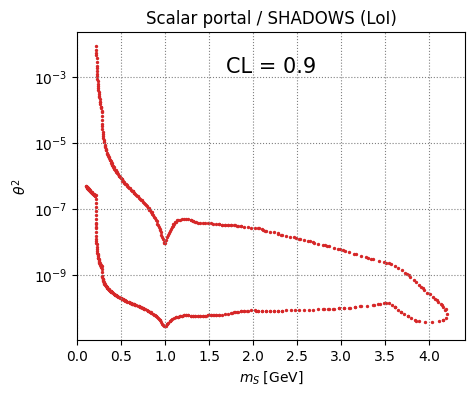

PyObject Text(0.5, 0.92, 'CL = 0.9')

In [9]:
fig, ax = make_plot(title="Scalar portal / SHADOWS (LoI)", xlabel=raw"$m_S\;[\mathrm{GeV}]$", ylabel=raw"$\theta^2$", figsize=(5,4))
ax.scatter(df.mS, df.theta2, s=2, color="tab:red")
ax.autoscale()
ax.set_xlim(left=0)
#ax.legend()
ax.text(0.5, 0.92, "CL = 0.9", fontsize=15, transform=ax.transAxes, ha="center", va="top")

In [10]:
CSV.write("$(@__DIR__)/../tables/sensitivity/SHADOWS/SHADOWS_scalar_sensitivity_CL90_unordered.csv", df)

"/Users/jl/Documents/Research/Projects/SensCalc/Code/SensMC/notebooks/../tables/sensitivity/SHADOWS/SHADOWS_scalar_sensitivity_CL90_unordered.csv"